In [120]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Cartopy and Gridding in python

This notebook contains an example code on how to make maps with cartopy and how to grid data, which is displayed on a map.

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk), last updated 05/03/2024

# Work in progress (no clean version jet / only brain dump)

We start by importing the necessary libraries for this jupyter notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cfeature

Lets start with a global map

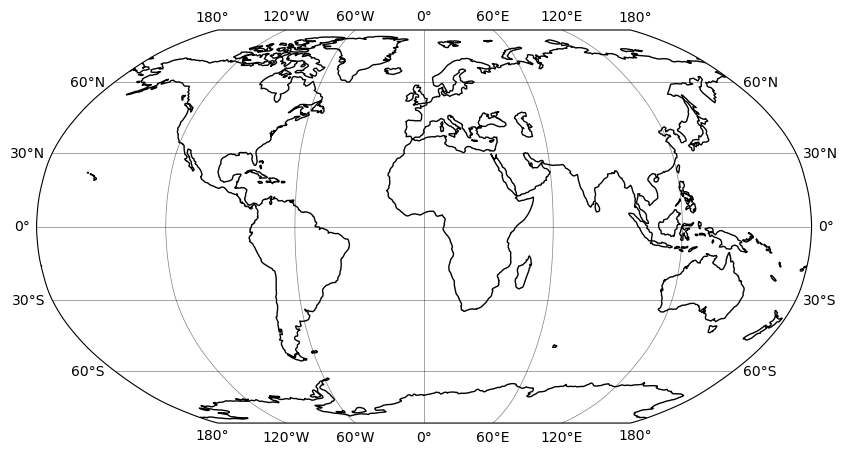

In [122]:
figure1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

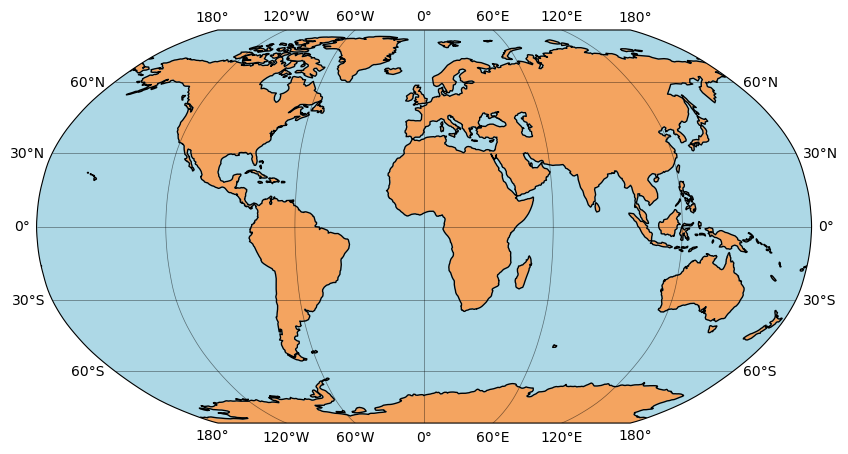

In [123]:
figure1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAND, color="sandybrown")
ax1.add_feature(cfeature.OCEAN, color="lightblue")

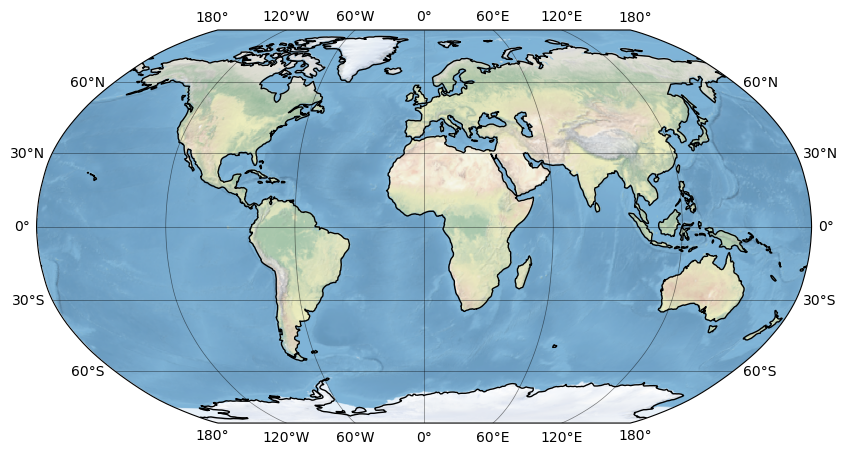

In [124]:
figure1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# feature scale 

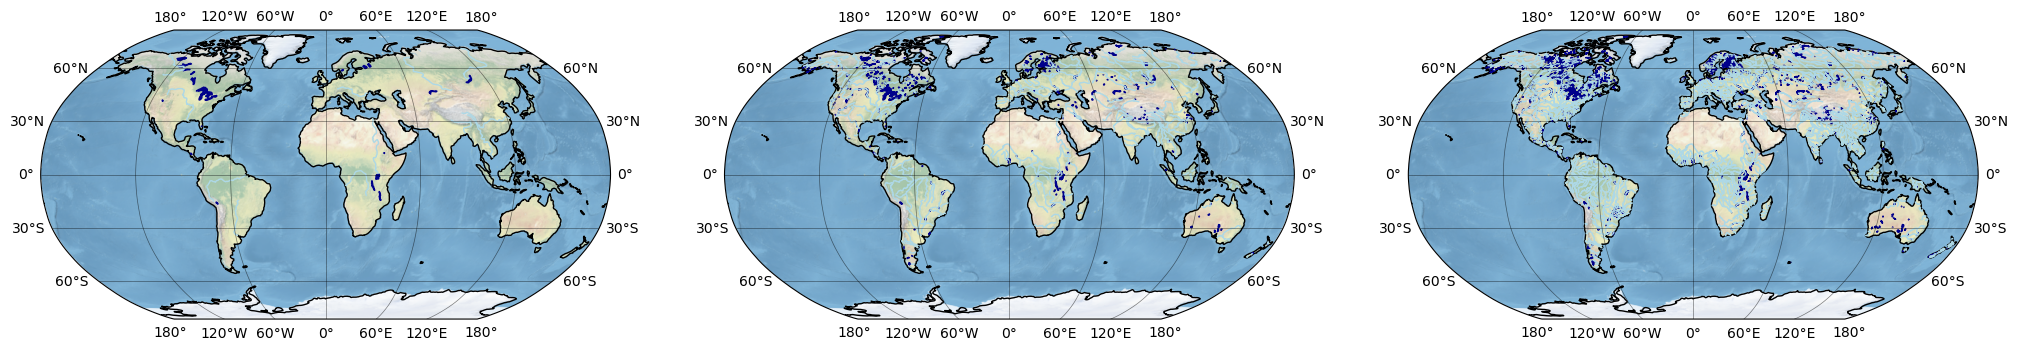

In [129]:
figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAKES.with_scale("110m"), color="darkblue")
ax1.add_feature(cfeature.RIVERS.with_scale("110m"), color="lightblue")

ax2 = plt.subplot(1, 3, 2, projection=ccrs.Robinson())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax2.add_feature(cfeature.LAKES.with_scale("50m"), color="darkblue")
ax2.add_feature(cfeature.RIVERS.with_scale("50m"), color="lightblue")

ax3 = plt.subplot(1, 3, 3, projection=ccrs.Robinson())
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax3.add_feature(cfeature.LAKES.with_scale("10m"), color="darkblue")
ax3.add_feature(cfeature.RIVERS.with_scale("10m"), color="lightblue")

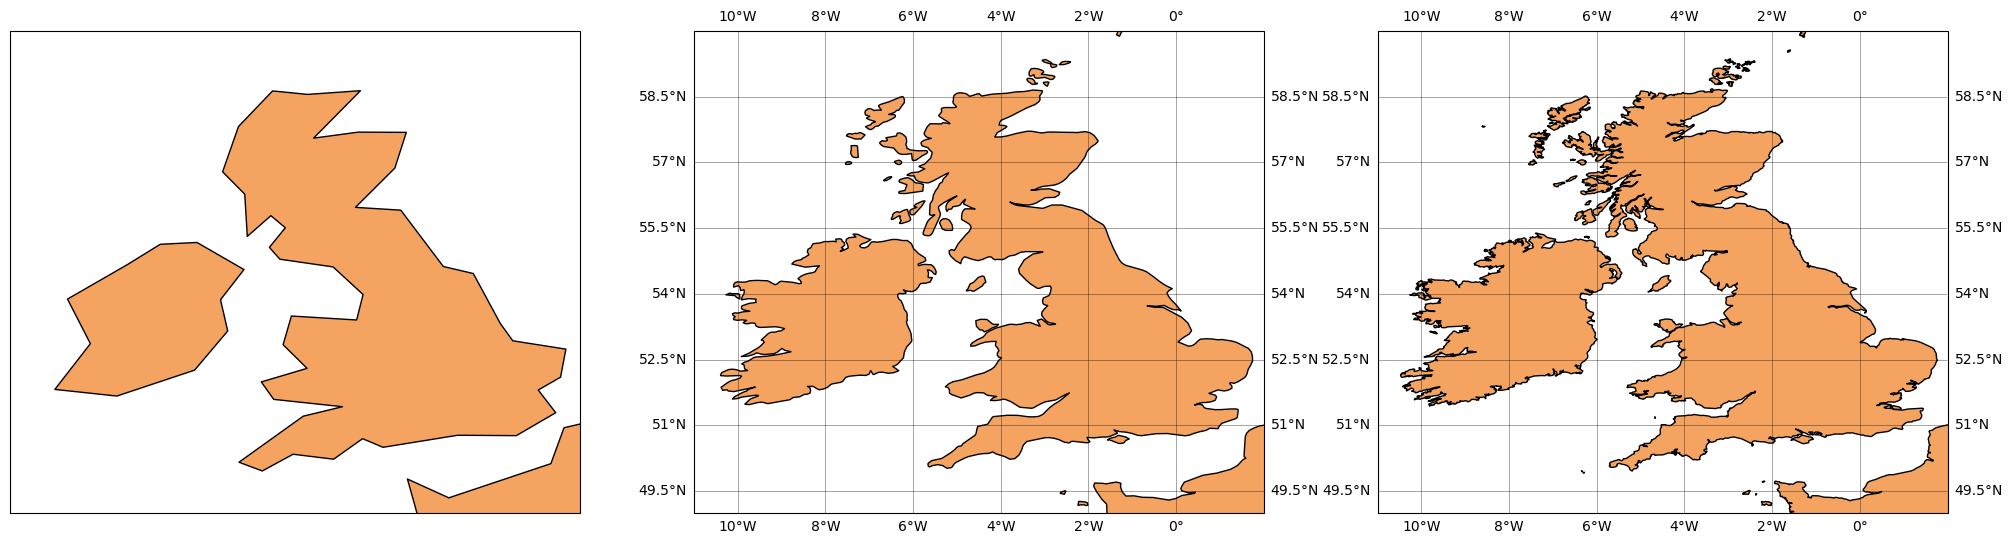

In [23]:
# Generate the coastline feature at three different scales
land_110m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "110m", edgecolor="k", facecolor="sandybrown"
)
land_50m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "50m", edgecolor="k", facecolor="sandybrown"
)
land_10m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "10m", edgecolor="k", facecolor="sandybrown"
)





figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.add_feature(land_110m)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-11,2, 49, 60], crs=ccrs.PlateCarree())

ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax2.add_feature(land_50m)
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax3.add_feature(land_10m)
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")


# global map rotate

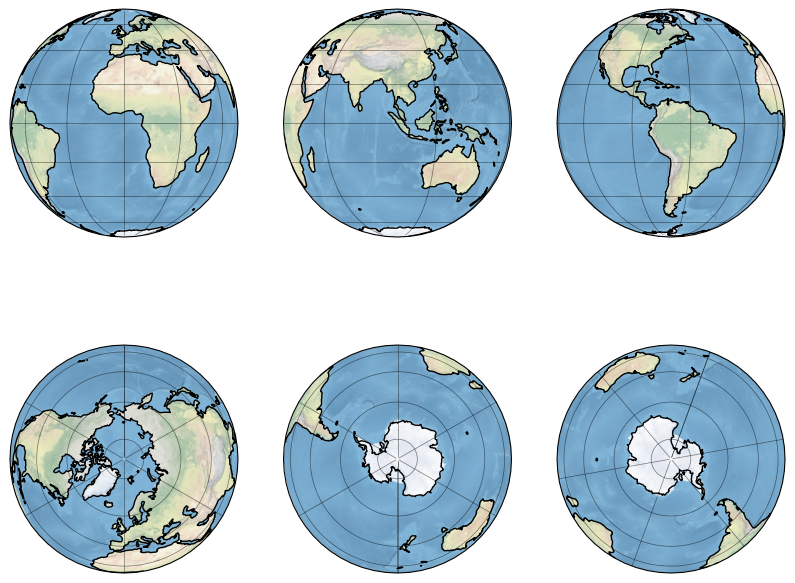

In [126]:
figure1 = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(
    2, 3, 1, projection=ccrs.Orthographic(central_latitude=0, central_longitude=0)
)
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax2 = plt.subplot(
    2, 3, 2, projection=ccrs.Orthographic(central_latitude=0, central_longitude=100)
)
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(
    2, 3, 3, projection=ccrs.Orthographic(central_latitude=0, central_longitude=290)
)
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax4 = plt.subplot(
    2, 3, 4, projection=ccrs.Orthographic(central_latitude=90, central_longitude=0)
)
ax4.stock_img()
ax4.coastlines()
ax4.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax5 = plt.subplot(
    2, 3, 5, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=0)
)
ax5.stock_img()
ax5.coastlines()
ax5.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax6 = plt.subplot(
    2, 3, 6, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=160)
)
ax6.stock_img()
ax6.coastlines()
ax6.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

 Plate Carrée (also known as Equirectangular or Equidistant Cylindrical.) 

The projected axes of cartopy maps are independent from the coordinate system of the used dataset. The `projection` arguments defines the map outlay. The `transform` argument tells Cartopy in which coordinate system the data is presented.

Lets have a look at an example using Lat Lon and polar steographix coordinates systems for Antarctica research stations operated by the British Antarctic Survey


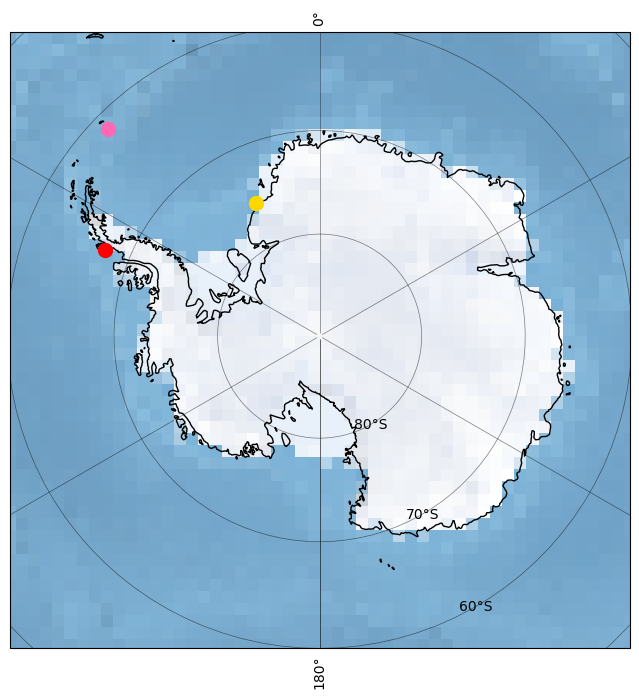

In [127]:
Rothera_lat = -67.56778
Rothera_lon = -68.12778
Halley_lat = -75.56805
Halley_lon = -25.50833
Signy_x_ps = -2322053.890662
Signy_y_ps = 2273923.172021

figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax1.plot(
    Rothera_lon,
    Rothera_lat,
    color="red",
    marker="o",
    markersize=10,
    transform=ccrs.PlateCarree(),
)
ax1.plot(
    Halley_lon,
    Halley_lat,
    color="gold",
    marker="o",
    markersize=10,
    transform=ccrs.PlateCarree(),
)
ax1.plot(
    Signy_x_ps,
    Signy_y_ps,
    color="hotpink",
    marker="o",
    markersize=10,
    transform=ccrs.SouthPolarStereo(),
)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs  # In addition, we import cartopy's coordinate reference system submodule:
from cartopy import feature as cfeature
import matplotlib.patches as mpatches
import matplotlib.path as mpath

In [9]:
min_lon = 4
max_lon = 20
min_lat = 39
max_lat = 50

central_lon = (min_lon + max_lon) / 2
central_lat = (min_lat + max_lat) / 2

extent = [min_lon, max_lon, min_lat, max_lat]

width_ix = max_lon - min_lon
height_ix = max_lat - min_lat

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


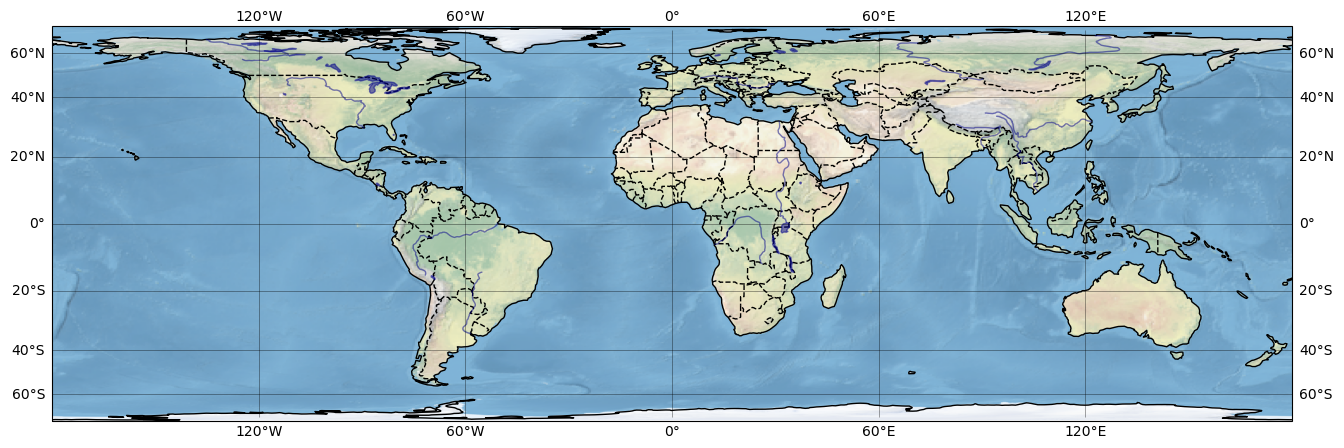

In [10]:
figure1 = plt.figure(figsize=(16, 10))
ax1 = figure1.add_subplot(
    1, 1, 1, projection=ccrs.LambertCylindrical(central_longitude=0)
)
ax1.stock_img()
ax1.coastlines()
# ax.add_feature(cfeature.OCEAN , color="lightblue")
# ax.add_feature(cfeature.LAND , color="lightgrey")
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="black")
ax1.add_feature(cfeature.LAKES, color="darkblue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="darkblue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

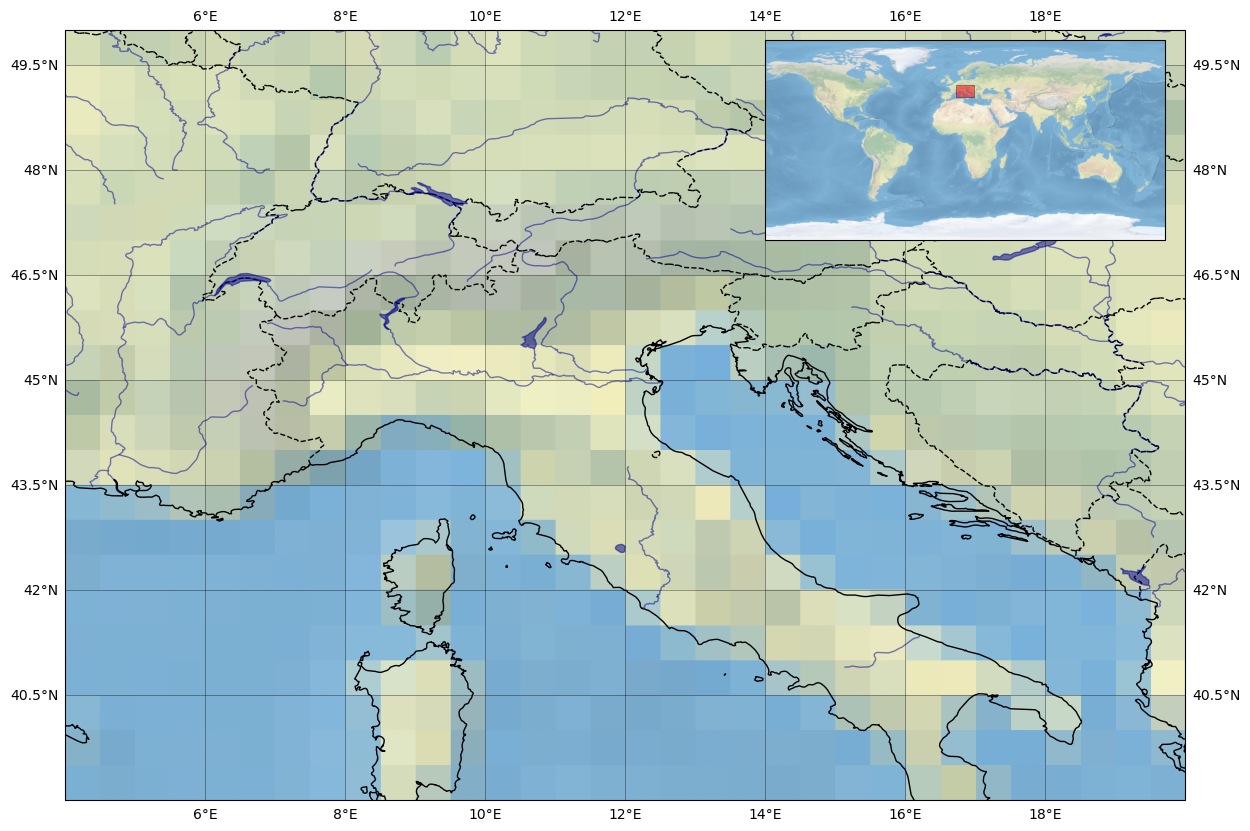

In [11]:
figure1 = plt.figure(figsize=(16, 10))
ax1 = figure1.add_subplot(
    1, 1, 1, projection=ccrs.PlateCarree(central_longitude=central_lon)
)
ax1.set_extent(extent)
ax1.stock_img()
ax1.coastlines()
# ax.add_feature(cfeature.OCEAN , color="lightblue")
# ax.add_feature(cfeature.LAND , color="lightgrey")
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="black")
ax1.add_feature(cfeature.LAKES, color="darkblue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="darkblue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# insert an additional axes
ax2 = plt.axes(
    [0.6, 0.645, 0.25, 0.25], projection=ccrs.PlateCarree(central_longitude=central_lon)
)

# add stock photo
ax2.stock_img()

# add rectanular of study area
ax2.add_patch(
    mpatches.Rectangle(
        xy=[min_lon, min_lat],
        width=width_ix,
        height=height_ix,
        facecolor="red",
        alpha=0.5,
        edgecolor="black",
        linewidth=0.5,
        transform=ccrs.PlateCarree(),
    )
)

# Gridding

In [12]:
to be done

SyntaxError: invalid syntax (4102327220.py, line 1)

ERROR:root:Cannot parse: 1:3: to be done
Traceback (most recent call last):
  File "C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\black\__init__.py", line 1224, in format_str
    dst_contents = _format_str_once(src_contents, mode=mode, lines=lines)
  File "C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\black\__init__.py", line 1238, in _format_str_once
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\black\parsing.py", line 89, in lib2to3_parse
    raise exc from None
black.parsing.InvalidInput: Cannot parse: 1:3: to be done


In [ ]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.stock_img()
ax.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-')


In [ ]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [ ]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

ax.add_feature(cartopy.feature.COASTLINE)
ax.stock_img()
ax.gridlines(linewidth=0.5,draw_labels=True , color='k', alpha=0.5, linestyle='-')

